In [1]:
import configparser
import numpy as np
from src.clustering.algorithm_wrappers.KMeansWrapper import KMeansWrapper
import pandas as pd

In [2]:
config = configparser.ConfigParser()
config.read('../../config.ini')
embedding_path = '../../' + config['DATA']['UserEmbeddingPath']
test_path = '../../' + config['DATA']['TestUserEmbeddingPath']


In [3]:
from sklearn.preprocessing import StandardScaler
import umap

user_embedding = np.load(embedding_path)  # todo get_historic_user_embeddings
test_embedding = np.load(test_path)

# standardize data
scaler = StandardScaler().fit(user_embedding)
user_embedding = scaler.transform(user_embedding)
test_embedding = scaler.transform(test_embedding)

# transform data
N_NEIGHBORS= int(config['UMAP']['n_neighbors'])
MIN_DIST= float(config['UMAP']['min_dist'])
N_COMPONENTS= int(config['UMAP']['n_components'])
METRIC=config['UMAP']['metric']
fit = umap.UMAP(
    n_neighbors= N_NEIGHBORS,
    min_dist= MIN_DIST,
    n_components= N_COMPONENTS,
    metric=METRIC
)

reducer = fit.fit(user_embedding)
user_red = reducer.transform(user_embedding)
user_test_red = reducer.transform(test_embedding)


/home/vera/uni/Master/SoSe23/EAI/04-continous-user-feedback/venv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/vera/uni/Master/SoSe23/EAI/04-continous-user-feedback/venv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/vera

In [4]:
model = KMeansWrapper()
model.train(user_red)
model.extract_representations(user_red)  # return tuple (clusterid, location)

In [5]:
# model.visualize(user_red)
# model.figure.show()

# Load frequency data and categories

In [6]:
# for each cluster get user frequencies
import json

# Opening JSON file
user_mapping = json.load(open('../../data/user_mapping.json'))

#load frequencies
df = pd.read_csv('../../data/wordclouds/user_category_frequency.csv')
user_category_frequ = df.loc[df['user'].isin(user_mapping.keys())]
del df
# put into wordcloud
# normalize wordcloud

In [7]:
user_category_frequ.iloc[:, 2:] = user_category_frequ.iloc[:, 2:].div(user_category_frequ.iloc[:, 2:].sum(axis=1), axis=0)
user_category_frequ

,Unnamed: 0,user,video,northamerica,sports,news,autos,kids,movies,lifestyle,middleeast,foodanddrink,music,travel,health,finance,entertainment,weather,tv
1,1,U91836,0.021053,0.0,0.031579,0.631579,0.000000,0.0,0.010526,0.063158,0.0,0.042105,0.010526,0.073684,0.010526,0.084211,0.000000,0.021053,0.000000
5,5,U19739,0.020833,0.0,0.208333,0.541667,0.020833,0.0,0.000000,0.041667,0.0,0.041667,0.020833,0.020833,0.041667,0.000000,0.020833,0.000000,0.020833
10,10,U89744,0.009434,0.0,0.471698,0.150943,0.000000,0.0,0.028302,0.132075,0.0,0.000000,0.037736,0.000000,0.009434,0.056604,0.075472,0.009434,0.018868
12,12,U92486,0.010000,0.0,0.340000,0.310000,0.000000,0.0,0.070000,0.080000,0.0,0.040000,0.020000,0.000000,0.010000,0.060000,0.020000,0.000000,0.040000
13,13,U29155,0.000000,0.0,0.259740,0.155844,0.025974,0.0,0.077922,0.025974,0.0,0.038961,0.116883,0.012987,0.064935,0.038961,0.103896,0.012987,0.064935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34768,34768,U59698,0.021978,0.0,0.032967,0.274725,0.021978,0.0,0.043956,0.230769,0.0,0.054945,0.043956,0.054945,0.032967,0.021978,0.043956,0.021978,0.098901
36382,36382,U64289,0.000000,0.0,0.037037,0.666667,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.074074,0.111111,0.000000,0.111111
36457,36457,U61054,0.016129,0.0,0.322581,0.338710,0.016129,0.0,0.032258,0.016129,0.0,0.000000,0.016129,0.000000,0.032258,0.048387,0.032258,0.064516,0.064516
38091,38091,U16852,0.000000,0.0,0.000000,0.133333,0.000000,0.0,0.066667,0.400000,0.0,0.000000,0.066667,0.066667,0.066667,0.066667,0.000000,0.000000,0.133333


# Example: Cluster 0

In [15]:
labels = model.model.predict(user_red)
cluster_in = (labels == 0).nonzero()[0]

cluster_user_ids = [key for key in user_mapping if user_mapping[key] in cluster_in]
cluster_freq = user_category_frequ.loc[user_category_frequ['user'].isin(cluster_user_ids)]

In [16]:
freq = cluster_freq.iloc[:, 2:].sum()
freq

video             3.027521
northamerica      0.000000
sports           30.110835
news             56.762178
autos             4.848642
kids              0.000000
movies            5.321055
lifestyle        19.591872
middleeast        0.000000
foodanddrink      9.022329
music             6.356059
travel            6.035524
health            7.053977
finance          12.945741
entertainment     5.648332
weather           2.027756
tv               13.248178
dtype: float64

In [28]:
freq.index

Index(['video', 'northamerica', 'sports', 'news', 'autos', 'kids', 'movies',
       'lifestyle', 'middleeast', 'foodanddrink', 'music', 'travel', 'health',
       'finance', 'entertainment', 'weather', 'tv'],
      dtype='object')

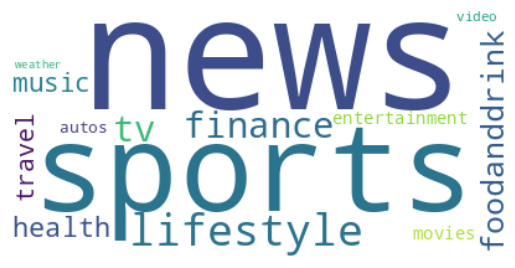

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white").generate_from_frequencies(freq)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Generate for all clusters

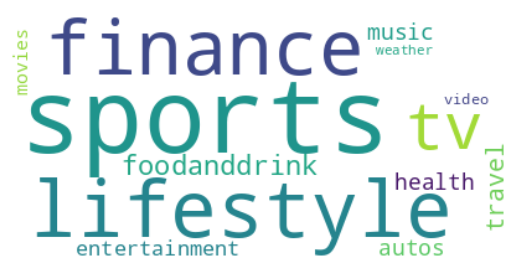

In [29]:
freq_all = pd.DataFrame(index=freq.index)
for cluster in range(int(config['Clustering']['NoClusters'])):
   # get ids of cluster
    cluster_in = (labels == cluster).nonzero()[0]
    cluster_user_ids = [key for key in user_mapping if user_mapping[key] in cluster_in]
    cluster_freq = user_category_frequ.loc[user_category_frequ['user'].isin(cluster_user_ids)]

    # get total sum (not normalized)
    freq = cluster_freq.iloc[:, 2:].sum()
    freq_all[f"{cluster}"] = freq.values
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(freq.drop('news', axis=0))

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    wordcloud.to_file(f"../../data/wordclouds/{cluster}_wordcloud.png")


In [22]:
freq_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
video,3.027521,0.709286,2.197273,2.494813,1.022620,0.904260,1.043215,2.645607,0.854163,1.281482,1.070362,1.510871,4.832894,1.154195,1.090321,4.856757,1.159417,1.649915,3.786925,1.051547
northamerica,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sports,30.110835,3.121662,14.738450,16.837050,4.401674,7.766189,11.137635,12.925496,6.154821,5.469451,7.067105,10.846731,41.031969,4.948251,5.471278,42.816003,8.173914,7.484570,32.028404,9.965346
news,56.762178,11.109052,38.698019,38.356489,12.447586,20.687232,24.421646,31.866466,11.604542,17.949588,16.473816,24.192276,75.868371,17.281122,16.538416,78.828356,17.172825,22.361674,70.541191,19.514455
autos,4.848642,1.029353,4.099327,4.478002,1.493792,1.803157,3.987900,5.158170,1.632553,2.644266,1.708302,1.815027,7.688321,1.568967,1.969421,7.169096,1.879033,2.346453,7.666357,2.539039
kids,0.000000,0.000000,0.017857,0.012397,0.000000,0.000000,0.006667,0.000000,0.000000,0.000000,0.000000,0.000000,0.003268,0.000000,0.000000,0.014925,0.000000,0.006623,0.000000,0.000000
movies,5.321055,1.397837,2.122712,3.529568,1.733295,1.683062,2.141867,3.891954,1.092370,1.705143,1.130534,1.899141,7.073737,2.294438,1.926837,7.641992,1.368522,2.689013,6.119866,1.717118
lifestyle,19.591872,5.798968,8.509006,13.076763,8.112405,4.669776,7.385769,15.298932,4.859254,5.891348,4.480964,5.800849,23.331588,9.804177,6.040467,25.300896,5.259050,9.668628,20.073037,7.521832
middleeast,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
foodanddrink,9.022329,3.011098,5.123254,5.644606,3.073145,2.080189,4.203128,8.275116,2.399838,2.767893,3.308408,3.082349,12.455142,3.807809,2.039507,13.796165,2.317153,3.238587,11.288963,3.845802


In [25]:
freq_all_norm = freq_all.div(freq_all.sum(axis=0), axis=1)
freq_all_norm * 100


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
video,1.663473,1.729965,2.072899,2.044929,2.005137,1.614750,1.337455,2.204672,2.083325,2.288361,2.184412,2.189668,1.988845,1.923658,2.096772,1.867983,2.187578,2.199886,1.753206,1.502210
northamerica,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sports,16.544415,7.613810,13.904199,13.800860,8.630733,13.868194,14.279020,10.771247,15.011760,9.766876,14.422663,15.719900,16.885584,8.247084,10.521688,16.467693,15.422479,9.979427,14.827965,14.236208
news,31.188010,27.095249,36.507565,31.439745,24.407031,36.941486,31.309802,26.555389,28.303761,32.052836,33.620032,35.061270,31.221552,28.801871,31.804646,30.318599,32.401557,29.815565,32.657959,27.877793
autos,2.664089,2.510617,3.867289,3.670493,2.929004,3.219923,5.112692,4.298475,3.981835,4.721903,3.486331,2.630474,3.163918,2.614945,3.787348,2.757345,3.545345,3.128604,3.549239,3.627198
kids,0.000000,0.000000,0.016846,0.010161,0.000000,0.000000,0.008547,0.000000,0.000000,0.000000,0.000000,0.000000,0.001345,0.000000,0.000000,0.005741,0.000000,0.008830,0.000000,0.000000
movies,2.923657,3.409359,2.002559,2.893088,3.398618,3.005467,2.745983,3.243295,2.664316,3.044898,2.307212,2.752378,2.911003,3.824063,3.705455,2.939228,2.582117,3.585351,2.833271,2.453025
lifestyle,10.764765,14.143824,8.027364,10.718658,15.906676,8.338885,9.468935,12.749110,11.851839,10.520265,9.144825,8.407027,9.601477,16.340295,11.616283,9.731114,9.922735,12.891504,9.293073,10.745474
middleeast,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
foodanddrink,4.957324,7.344141,4.833259,4.626726,6.025775,3.714623,5.388625,6.895930,5.853263,4.942667,6.751853,4.467173,5.125573,6.346349,3.922129,5.306217,4.371987,4.318116,5.226372,5.494003
